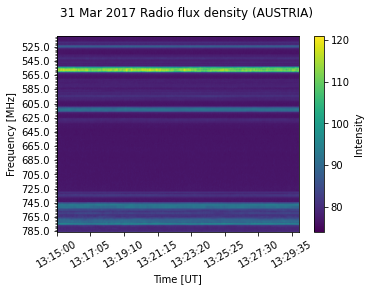

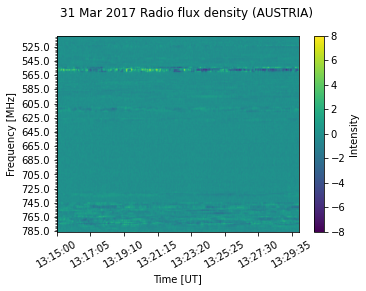

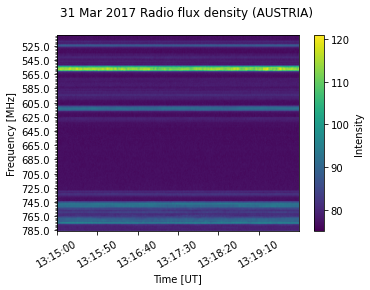

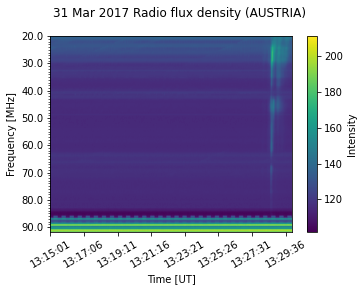

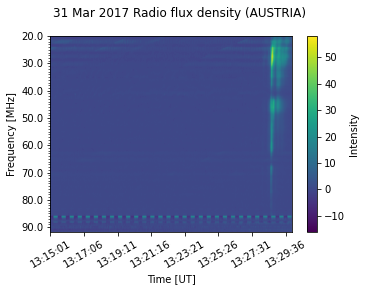

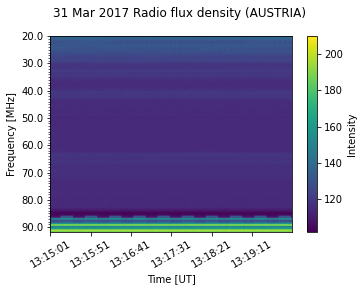

In [5]:
from radiospectra.sources.callisto import CallistoSpectrogram
import radiospectra.sources.callisto as cal
from datetime import datetime as dt
import os

path_data = "eCallistoData/"
date_format = "%Y %m %d %H %M"
path_script = os.getcwd().replace("\\", "/") + "/"

def pathDataDay(year: int, month: int, day: int):
    """
    returns the full path of the data for a specific day
    """
    return path_script + path_data + '{}/{}/{}/'.format(str(year), str(month).zfill(2), str(day).zfill(2))

def plotSpectraFile(file):
    """
    loads an eCallisto spectrum from a file and plots it
    """
    spectrum_data = CallistoSpectrogram.read(file)
    spectrum_data.peek()

def plotSpectraFileNoBackground(file):
    """
    loads an eCallisto spectrum from a file, removes the background and plots it
    """
    spectrum_data = CallistoSpectrogram.read(file)
    spectrum_data = spectrum_data.subtract_bg()
    spectrum_data.peek()

def plotSpectraFileParts(file):
    """
    loads an eCallisto spectrum from a file, cuts away the last 2/3 and plots it
    """
    spectrum_data = CallistoSpectrogram.read(file)
    spectrum_data.data = spectrum_data.data[:,:int(spectrum_data.data.shape[1]/3)]
    spectrum_data.peek()

def downloadSpectra(year, month, day, hour_0, min_0, observatory):
    """
    downloads an eCallisto spectrum to ./eCallisoData/<year>/<month>/<day>/
    """
    download_path = pathDataDay(year, month, day)
    # hour_e = hour_0 + int((min_0 + 10) / 60)
    # min_e = int((min_0 + 10) % 60)
    time= dt.strptime(str(year) + " " + str(month) + " " + str(day) + " "
                      + str(hour_0) + " " + str(min_0), date_format)

    if not os.path.exists(download_path):
        os.makedirs(download_path)   

    url_list = cal.query(time, time, [observatory])
    cal.download(url_list, download_path)

def plotSpectra(year, month, day, hour, minute, observatory):
    """
    downloads an eCallisto spectrum to ./eCallisoData/<year>/<month>/<day>/
    and plots it

    :observatory: strID used by eCallisto
    """
    downloadSpectra(year, month, day, hour, minute, observatory)
    files = os.listdir(pathDataDay(year, month, day))
    for file in files:
        if file.endswith(".fit.gz"):
            plotSpectraFile(pathDataDay(year, month, day) + file)
            plotSpectraFileNoBackground(pathDataDay(year, month, day) + file)
            plotSpectraFileParts(pathDataDay(year, month, day) + file)

year = 2017
month = 3
day = 31
hour = 13
minute = 28
observatory = "AUSTRIA"

plotSpectra(year, month, day, hour, minute, observatory)

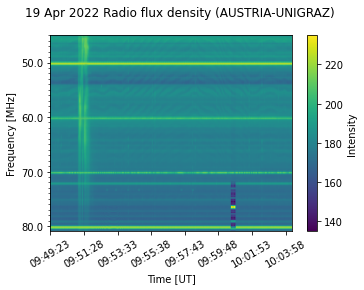

In [4]:
plotSpectraFile("eCallistoData/2022/04/19/AUSTRIA-UNIGRAZ_20220419_094923_01.fit.gz")